In [23]:
#-----------------------Setup For Plotting---------------------------

from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
import numpy as np 
import pickle
import itertools

from plotting_helpers import *
from ga_util_objects import *
from config import *

PROBLEM = ['LR', 'KM_4', 'KM_16'] 
DATA_PATH = 'processed_datasets/'
DATASETS=['Adult', 'Credit', 'Spam', 'Mushrooms']
utils = {}
for problem in PROBLEM:
    for dataset_filename in DATASETS:
        with open(DATA_PATH + dataset_filename +'.p', 'rb') as input_file:
            data_object = pickle.load(input_file)
        if problem == 'KM_4':
            util_obj = K_Median(data_object['clustering_sets']['public'],
                                            data_object['clustering_sets']['private'],
                                            4)
        elif problem == 'KM_16':
            util_obj = K_Median(data_object['clustering_sets']['public'],
                                            data_object['clustering_sets']['private'],
                                            16)
        elif problem == 'LR':
            util_obj = Log_Regression(data_object['test_train_sets']['test_x'], 
                        data_object['test_train_sets']['test_y'], 
                )
        utils[dataset_filename + problem] = util_obj

#Prepping baselines
baseline = {}
for problem in PROBLEM:
    for dataset in DATASETS:
        if problem == 'LR':
            baseline[dataset + problem] = utils[dataset+problem].get_utility(np.zeros(utils[dataset+problem].cand_size))
        else:
            candidates = utils[dataset+problem].get_initial_pop(1000, 1e-6, np.random.default_rng())
            baseline[dataset+problem] = np.mean(utils[dataset+problem].get_utility_all(candidates))

with open('misc_p_files/our_final_best.p', 'rb') as input_file:
            our_best = pickle.load(input_file)

with open('misc_p_files/non_private_baselines.p', 'rb') as input_file:
            non_priv_baseline = pickle.load(input_file)
if not os.path.exists('Plots/Sup_plots/'):
    os.makedirs('Plots/Sup_plots/')

Loading distance matrix from cache
Loading distance matrix from cache
Loading distance matrix from cache
Loading distance matrix from cache
Loading distance matrix from cache
Loading distance matrix from cache
Loading distance matrix from cache
Loading distance matrix from cache


In [24]:
#-------------Function to create result dictionaries----------------------------
def get_results_and_dump(result_path, result_name, out_name, datasets=DATASETS, problems=PROBLEM, bug=False, simple=False, REFRESH=False):
    ci_dict = {}
    if os.path.exists('Result_Dicts/{}'.format(out_name)) and not REFRESH:
        with open('Result_Dicts/{}'.format(out_name), 'rb') as input_file:
            ci_dict = pickle.load(input_file)
    else:
        for problem in problems:
            for dataset in datasets:
                if bug:
                    results = file_reader('{}{}/'.format(result_path, dataset), problem+result_name)
                else:
                    results = file_reader('{}{}/{}/'.format(result_path, dataset, problem), result_name)
                if simple:
                    performance = compute_final_utilities_simple(results, utils[dataset+problem])
                else:
                    performance = compute_final_utilities(results, utils[dataset+problem], performance=False)
                ci_dict[dataset+problem] = get_CI(performance)
        with open('Result_Dicts/{}'.format(out_name), "wb") as outfile:
            pickle.dump(ci_dict, outfile)
    return ci_dict
def flip(items, ncol):
    return itertools.chain(*[items[i::ncol] for i in range(ncol)])

In [25]:
#Code to make the grid params file
ci_dict = get_results_and_dump('Grid_Experiment/', 'ga', 'grid_util_dict.p')
epsilons = GENS_EPS
candidate_keys = {}
for problem in PROBLEM:
    for i, dataset in enumerate(DATASETS):
        #Best results
        filter_vec = [None] * 5
        best_per_gen = []
        for eps in epsilons:
            filter_vec[-1] = str(eps)
            best_per_gen.append(get_top_k(ci_dict[dataset+problem], k = 10, restriction=filter_vec))

        candidate_keys[dataset+problem] = [x[0][0] for x in best_per_gen]
        
with open( 'misc_p_files/grid_params.p', "wb" ) as outfile:
    pickle.dump(candidate_keys, outfile)

Loaded 60480 files
Loaded 60480 files
Loaded 60480 files
Loaded 60480 files
Loaded 60480 files
Loaded 60480 files
Loaded 60480 files
Loaded 60480 files
Loaded 60480 files
Loaded 60480 files
Loaded 60480 files
Loaded 60480 files


In [26]:
#Code to make the non-private grid params file

ci_dict = get_results_and_dump('Non_Priv_Grid_Experiment/', 'ga', 'np_grid_util_dict.p')
candidate_keys = {}
for problem in PROBLEM:
    for i, dataset in enumerate(DATASETS):
        #Best results
        filter_vec = [None] * 5
        best_per_gen = []
        for eps in [10.0]:
            filter_vec[-1] = str(eps)
            best_per_gen.append(get_top_k(ci_dict[dataset+problem], k = 10, restriction=filter_vec))

        candidate_keys[dataset+problem] = [x[0][0] for x in best_per_gen][0]


print(candidate_keys)
with open( 'misc_p_files/np_grid_params.p', "wb" ) as outfile:
    pickle.dump(candidate_keys, outfile)

Loaded 11520 files
Loaded 11520 files
Loaded 11520 files
Loaded 11520 files
Loaded 11520 files
Loaded 11520 files
Loaded 11520 files
Loaded 11520 files
Loaded 11520 files
Loaded 11520 files
Loaded 11520 files
Loaded 11520 files
{'AdultLR': ['200', '10', '0.0094', '0.5', '10.0'], 'CreditLR': ['200', '40', '0.0577', '0.8', '10.0'], 'SpamLR': ['200', '40', '0.0339', '0.65', '10.0'], 'MushroomsLR': ['200', '40', '0.0183', '0.8', '10.0'], 'AdultKM_4': ['200', '10', '0.40', '0.5', '10.0'], 'CreditKM_4': ['200', '40', '0.40', '0.65', '10.0'], 'SpamKM_4': ['100', '10', '0.40', '0.5', '10.0'], 'MushroomsKM_4': ['200', '10', '0.20', '0.35', '10.0'], 'AdultKM_16': ['200', '10', '0.12', '0.65', '10.0'], 'CreditKM_16': ['200', '10', '0.09', '0.8', '10.0'], 'SpamKM_16': ['100', '10', '0.06', '0.35', '10.0'], 'MushroomsKM_16': ['200', '5', '0.06', '0.5', '10.0']}


Loaded 1800 files
Loaded 1800 files
Loaded 1800 files
Loaded 1800 files
Loaded 1800 files
Loaded 1800 files
Loaded 1800 files
Loaded 1800 files
Loaded 1800 files
Loaded 1800 files
Loaded 1800 files
Loaded 1800 files


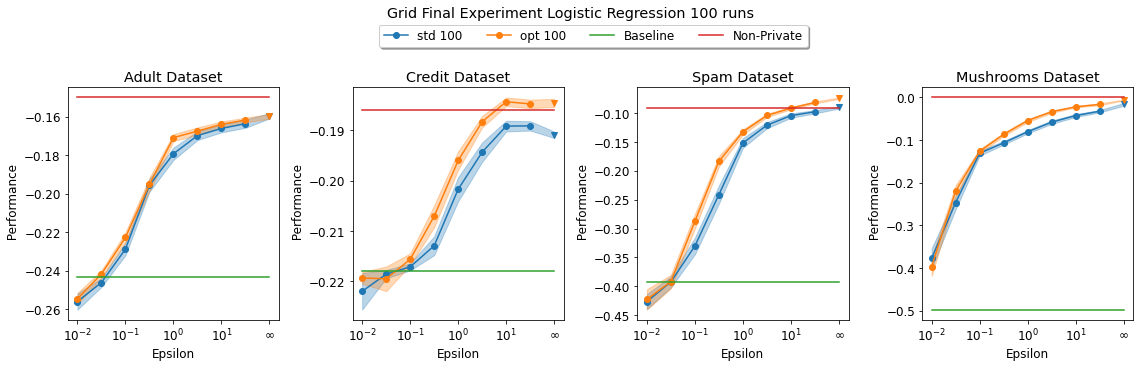

<Figure size 432x288 with 0 Axes>

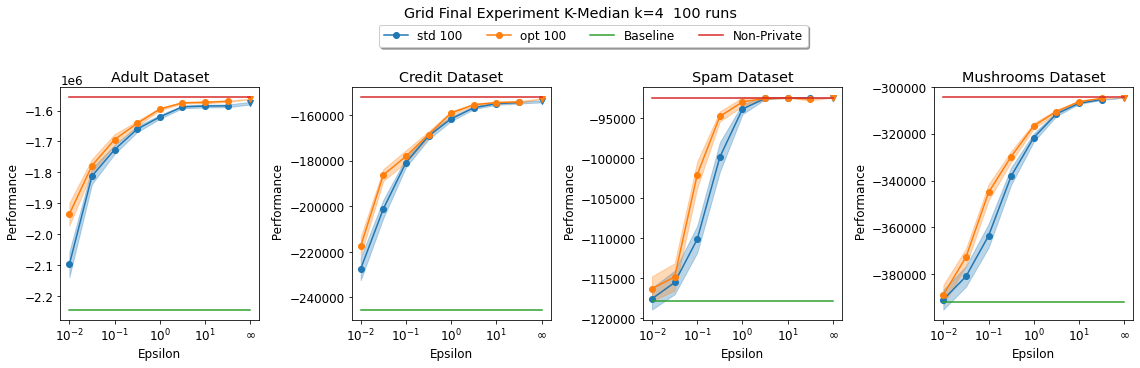

<Figure size 432x288 with 0 Axes>

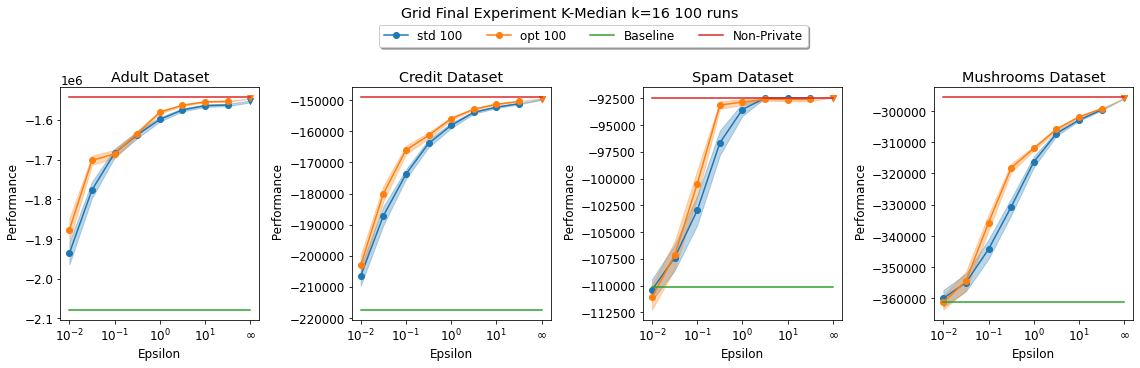

<Figure size 432x288 with 0 Axes>

In [28]:
#Code to get the 100 run version (Grid_ReRun) and make the pickle file we need for everything else
grid_final_dict = get_results_and_dump('Grid_Final/', 'ga', 'grid_re_run.p', datasets=DATASETS)
our_best = {}
our_best['default'] = {}
our_best['optimal'] = {}
epsilons = GENS_EPS + [-1]
eps_to_plot = GENS_EPS + [100]
plt.rcParams.update({'font.size': 12})
nice_names = {'LR': 'Logistic Regression', 'KM_4':'K-Median k=4 ', 'KM_16':'K-Median k=16'}
for problem in PROBLEM:
    fig, axs = plt.subplots(nrows=1,ncols=len(DATASETS), figsize=(16,5))
    fig.suptitle("Grid Final Experiment {} 100 runs\n".format(nice_names[problem]), y=1.02)
    for i, dataset in enumerate(DATASETS):
        result = grid_final_dict[dataset+problem]['std']
        values = [result[str(eps)][0] for eps in epsilons]
        color = next(axs[i]._get_lines.prop_cycler)['color']
        axs[i].semilogx(eps_to_plot[:-1], values[:-1], label='std 100',color=color, marker='o')
        axs[i].semilogx(eps_to_plot[-1], values[-1],color=color,linestyle='None', marker='v')
        lower = [result[str(eps)][1] for eps in epsilons]
        upper = [result[str(eps)][2] for eps in epsilons]
        axs[i].fill_between(eps_to_plot, lower, upper, color=color,alpha=0.3)
        our_best['default'][dataset+problem] = [values, lower, upper]

        result = grid_final_dict[dataset+problem]['opt']
        values = [result[str(eps)][0] for eps in epsilons]
        color = next(axs[i]._get_lines.prop_cycler)['color']
        axs[i].semilogx(eps_to_plot[:-1], values[:-1], label='opt 100',color=color, marker='o')
        axs[i].semilogx(eps_to_plot[-1], values[-1],color=color,linestyle='None', marker='v')
        lower = [result[str(eps)][1] for eps in epsilons]
        upper = [result[str(eps)][2] for eps in epsilons]
        axs[i].fill_between(eps_to_plot, lower, upper, color=color, alpha=0.3)
        our_best['optimal'][dataset+problem] = [values, lower, upper]

        axs[i].semilogx(eps_to_plot, [baseline[dataset+problem]] * len(epsilons), label='Baseline')
        axs[i].semilogx(eps_to_plot, [non_priv_baseline[dataset+problem]] * len(epsilons), label='Non-Private')
        axs[i].set_xticks([0.01, 0.1, 1.0, 10.0, 100.0])
        axs[i].set_xticklabels(['$10^{-2}$', '$10^{-1}$', '$10^{0}$', '$10^{1}$', '$\infty$'])
        axs[i].set_title("{} Dataset".format(dataset))
        axs[i].set_xlabel("Epsilon")
        axs[i].set_ylabel(" Performance")
    fig.tight_layout()
    handles, labels = axs[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.52, 0.97),
          fancybox=True, shadow=True, borderaxespad=0, ncol=5)
    plt.plot()
    plt.show()
    plt.clf()
with open( 'misc_p_files/our_final_best.p', "wb" ) as outfile:
    pickle.dump(our_best, outfile)